In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'../Dataset/crop_recommendation.csv')

In [8]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [10]:
df.size

17600

In [11]:
df.shape

(2200, 8)

In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [15]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: >

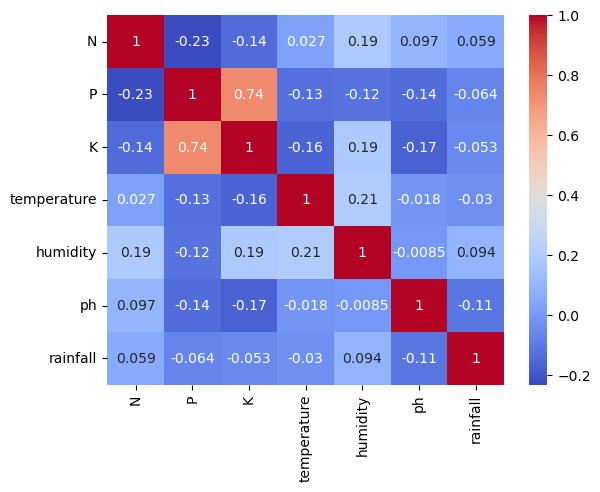

In [17]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")


### Seperating features and target label

In [18]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [24]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [26]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [28]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [31]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [32]:
#Saving trained SVM model

In [33]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [35]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

In [36]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [38]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [39]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [42]:
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/149.9 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 0.8/149.9 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 1.0/149.9 MB 1.4 MB/s eta 0:01:47
   ---------------------------------------- 1.6/149.9 MB 1.7 MB/s eta 0:01:29
    --------------------------------------- 2.1/149.9 MB 1.8 MB/s eta 0:01:24
    --------------------------------------- 2.6/149.9 MB 2.0 MB/s eta 0:01:16
    --------------------------------------- 3.1/149.9 MB 1.9 MB/s eta 0:01:17
   - -------------------------------------- 3.9/149.9 MB 2.2 MB/s eta 0:01:08
   - -------------------------------------- 4.7/149.9 MB 2.3 MB/s eta 0:01:03
   - -------------------------------------- 5.8/149.9 MB 2.6 MB/s eta 0:00:57
   - --

In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
target_encoded = le.fit_transform(target)
Ytrain_encoded = le.fit_transform(Ytrain)
Ytest_encoded = le.transform(Ytest)

# Train XGBoost
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict and evaluate
predicted_values = XB.predict(Xtest)
x = metrics.accuracy_score(Ytest_encoded, predicted_values)

print("XGBoost Accuracy is:", x * 100)

from sklearn.metrics import classification_report
print(classification_report(Ytest_encoded, predicted_values, target_names=le.classes_))


XGBoost Accuracy is: 99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [48]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target_encoded,cv=5)
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

### Saving trained XGBoost model

In [49]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

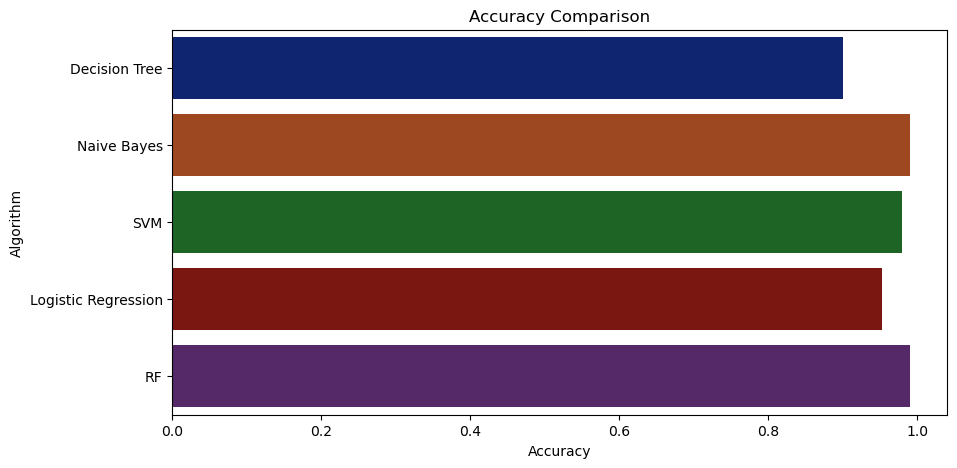

In [50]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [51]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


## Making a prediction

In [52]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [53]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=20, random_state=0)),
    ('svm', SVC(kernel='poly', degree=3, C=1, probability=True)),
    ('nb', GaussianNB()),
    ('xgb', XGBClassifier())
]

# Create stacking classifier
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit stacking classifier
stack.fit(Xtrain, Ytrain)

# Make predictions
stack_pred = stack.predict(Xtest)

# Print results
print("Stacking Classifier Accuracy:", metrics.accuracy_score(Ytest, stack_pred))
print("\nClassification Report:")
print(classification_report(Ytest, stack_pred))

# Cross validation score
stack_scores = cross_val_score(stack, features, target, cv=5)
print("\nCross Validation Scores:", stack_scores)
print("Mean CV Score:", stack_scores.mean())

# Save stacked model
import pickle
stack_pkl_filename = '../models/StackedModel.pkl'
stack_Model_pkl = open(stack_pkl_filename, 'wb')
pickle.dump(stack, stack_Model_pkl)
stack_Model_pkl.close()

# Example prediction
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = stack.predict(data)
print("\nPrediction for sample data:", prediction)

Stacking Classifier Accuracy: 0.9931818181818182

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      or

In [55]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Create input array
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Make prediction using stacked model
    prediction = stack.predict(input_data)
    
    # Get probability scores for all classes
    probabilities = stack.predict_proba(input_data)
    
    # Get top 3 predictions with their probabilities
    top_3_idx = np.argsort(probabilities[0])[-3:][::-1]
    top_3_crops = [stack.classes_[idx] for idx in top_3_idx]
    top_3_probs = [probabilities[0][idx] for idx in top_3_idx]
    
    return {
        'recommended_crop': prediction[0],
        'top_3_recommendations': list(zip(top_3_crops, top_3_probs))
    }

In [ ]:
# Get sample inputs from the dataset
sample_data = pd.read_csv(r'../Dataset/crop_recommendation.csv')
# Take 3 random samples from different crops
sample_inputs = sample_data.sample(n=3)[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values
true_labels = sample_data.sample(n=3)['label'].values

for i, inputs in enumerate(sample_inputs):
    result = predict_crop(*inputs)
    print("\nInput Parameters:")
    print(f"N: {inputs[0]}, P: {inputs[1]}, K: {inputs[2]}")
    print(f"Temperature: {inputs[3]}°C, Humidity: {inputs[4]}%")
    print(f"pH: {inputs[5]}, Rainfall: {inputs[6]} mm")
    print(f"Actual Crop in Dataset: {true_labels[i]}")
    print("\nPredictions:")
    print(f"Best Recommended Crop: {result['recommended_crop']}")
    print("\nTop 3 Recommendations with Confidence:")
    for crop, prob in result['top_3_recommendations']:
        print(f"{crop}: {prob*100:.2f}%")
    print("-" * 50)


Input Parameters:
N: 12.0, P: 58.0, K: 23.0
Temperature: 21.74600081°C, Humidity: 63.39503184%
pH: 6.765091462000001, Rainfall: 50.43306085 mm
Actual Crop in Dataset: apple

Predictions:
Best Recommended Crop: lentil

Top 3 Recommendations with Confidence:
lentil: 97.71%
mothbeans: 0.14%
blackgram: 0.14%
--------------------------------------------------

Input Parameters:
N: 82.0, P: 25.0, K: 51.0
Temperature: 24.31334971°C, Humidity: 87.47409052%
pH: 6.074209622000001, Rainfall: 48.11248366 mm
Actual Crop in Dataset: mothbeans

Predictions:
Best Recommended Crop: watermelon

Top 3 Recommendations with Confidence:
watermelon: 97.73%
jute: 0.13%
rice: 0.13%
--------------------------------------------------

Input Parameters:
N: 27.0, P: 43.0, K: 23.0
Temperature: 31.70447482°C, Humidity: 56.85420099%
pH: 5.875333778, Rainfall: 44.94317432 mm
Actual Crop in Dataset: maize

Predictions:
Best Recommended Crop: mothbeans

Top 3 Recommendations with Confidence:
mothbeans: 98.50%
lentil: 0

In [ ]:
# Interactive prediction
def get_user_input():
    print("Enter the following details:")
    N = float(input("Nitrogen content in soil (N) [0-140]: "))
    P = float(input("Phosphorus content in soil (P) [0-145]: "))
    K = float(input("Potassium content in soil (K) [0-205]: "))
    temperature = float(input("Temperature in Celsius [0-45]: "))
    humidity = float(input("Humidity in % [0-100]: "))
    ph = float(input("pH value of soil [0-14]: "))
    rainfall = float(input("Rainfall in mm [0-300]: "))
    return N, P, K, temperature, humidity, ph, rainfall

# Get prediction for user input
try:
    inputs = get_user_input()
    result = predict_crop(*inputs)
    print("\nPredictions:")
    print(f"Best Recommended Crop: {result['recommended_crop']}")
    print("\nTop 3 Recommendations with Confidence:")
    for crop, prob in result['top_3_recommendations']:
        print(f"{crop}: {prob*100:.2f}%")
except Exception as e:
    print("Error:", str(e))
    print("Please ensure all inputs are valid numbers within the specified ranges.")